<a href="https://colab.research.google.com/github/Praxis-QR/FDS/blob/main/Earthquake_BaseMap_Alternative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://4.bp.blogspot.com/-gbL5nZDkpFQ/XScFYwoTEII/AAAAAAAAAGY/CcVb_HDLwvs2Brv5T4vSsUcz7O4r2Q79ACK4BGAYYCw/s1600/kk3-header00-beta.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

#Maps Earthquakes <br>
http://qingkaikong.blogspot.com/2016/02/query-usgs-catalog-online-and-plot.html

In [1]:
import pandas as pd

In [2]:
# without this Basemap will not work
# 
#!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev > /dev/null
#!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip -q install basemap
!pip -q install basemap-data-hires

     |████████████████████████████████| 864 kB 7.7 MB/s 
     |████████████████████████████████| 30.5 MB 73.0 MB/s 
     |████████████████████████████████| 6.3 MB 47.3 MB/s 
     |████████████████████████████████| 46 kB 4.4 MB/s 
     |████████████████████████████████| 91.1 MB 77 kB/s 


In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
%matplotlib inline

# Get Data with Pandas

In [4]:
u0 = "http://earthquake.usgs.gov/fdsnws/event/1/query?format=text"
u1 = "starttime=2018-01-01"
u2 = "endtime=2022-01-01"
u3 = "minmagnitude=5.0"
url = u0+'&'+u1+'&'+u2+'&'+u3
print(url)

http://earthquake.usgs.gov/fdsnws/event/1/query?format=text&starttime=2018-01-01&endtime=2022-01-01&minmagnitude=5.0


In [5]:
df_quake = pd.read_csv(url, sep='|')
print(df_quake.head(3))

     #EventID                     Time  Latitude  Longitude  Depth/km Author  \
0  us7000g84h  2021-12-31T05:53:42.198    0.0488   120.4338    106.77     us   
1  us7000g83l  2021-12-31T00:58:32.591   37.6534   -31.7687     10.00     us   
2  us7000g857  2021-12-31T00:50:46.765  -22.4737   170.1563     10.00     us   

  Catalog Contributor ContributorID MagType  Magnitude MagAuthor  \
0      us          us    us7000g84h     mww        5.0        us   
1      us          us    us7000g83l      mb        5.0        us   
2      us          us    us7000g857      mb        5.0        us   

                          EventLocationName  
0             122 km NNE of Palu, Indonesia  
1  198 km SSW of Lajes das Flores, Portugal  
2       256 km ESE of Tadine, New Caledonia  


# Basic Map

In [6]:
################plot earthquakes###############
# get the latitude, longitude, and magnitude for plotting
lats = list(df_quake['Latitude'])
lons = list(df_quake['Longitude'])
mags = list(df_quake['Magnitude'])
print('lats', lats[0:5])
print('lons', lons[0:5])
print('mags', mags[0:5])


#scale the size of the earthquake on the map
min_size = 50
max_size = 90
min_mag = min(mags)
max_mag = max(mags)

frac = [(_i - min_mag) / (max_mag - min_mag) for _i in mags]
magnitude_size = [(_i * (max_size - min_size)) **2 for _i in frac]
print('frac', frac[0:5])
print('magnitude_size', magnitude_size[0:5])

lats [0.0488, 37.6534, -22.4737, -22.6042, -28.7732]
lons [120.4338, -31.7687, 170.1563, 170.0671, -176.3468]
mags [5.0, 5.0, 5.0, 5.0, 5.1]
frac [0.0, 0.0, 0.0, 0.0, 0.031249999999999896]
magnitude_size [0.0, 0.0, 0.0, 0.0, 1.5624999999999896]


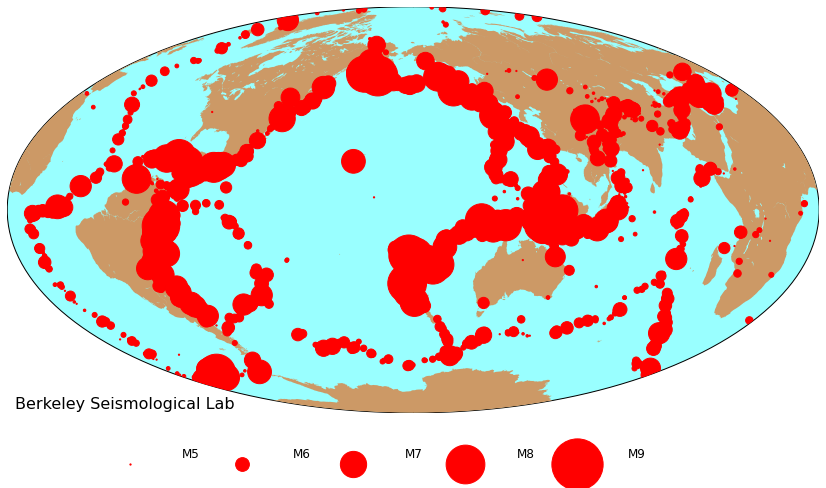

In [7]:
fig = plt.figure(figsize = (12,9))
map_ax = fig.add_axes([0.03, 0.13, 0.94, 0.82])

map = Basemap(projection='hammer',lon_0=180, resolution = 'l')

map.drawmapboundary(fill_color='#99ffff')
map.fillcontinents(color='#cc9966',lake_color='#99ffff')

x, y = map(lons, lats)
map.scatter(x, y, marker='o', s=magnitude_size, c='r',zorder=10)
#map.plot(x, y, 'o', markersize=5,zorder=6, markerfacecolor='#424FA4',markeredgecolor="#000000", alpha=0.1)
#map.plot(x, y, 'o', markersize=5,zorder=6, markerfacecolor='#424FA4',markeredgecolor="#000000", alpha=0.8)

#######plot scale, annotation, and legend#######
plt.annotate('Berkeley Seismological Lab', xy=(0.01, 0.01), xycoords='axes fraction', fontsize = 16)
legends = []
for mag_ in [5., 6., 7., 8., 9.]:
    frac = (mag_ - min_mag + 0.1) / (max_mag - min_mag)
    magnitude_size = (frac * (max_size - min_size)) **2
    l1 = plt.scatter([], [], marker='o', s=magnitude_size, c='red', zorder=10)
    legends.append(l1)
    
ll = ['M5\n', 'M6\n', 'M7\n', 'M8\n', 'M9\n']

leg = plt.legend(legends, ll, scatterpoints = 1, ncol=6, frameon=False, fontsize=12, handlelength=7, \
    columnspacing = 0.01, bbox_to_anchor=(0.8, -0.06)) 

# Heat Map <br>
http://qingkaikong.blogspot.com/2016/02/plot-earthquake-heatmap-on-basemap-and.html

In [8]:
# compute appropriate bins to aggregate data
# nx is number of bins in x-axis, i.e. longitude
# ny is number of bins in y-axis, i.e. latitude
nx = 36 # 10 degree for longitude bin
ny = 18 # 10 degree for latitude bin

# form the bins
lon_bins = np.linspace(-180, 180, nx)
lat_bins = np.linspace(-90, 90, ny)
    
# aggregate the number of earthquakes in each bin, we will only use the density
density, lat_edges, lon_edges = np.histogram2d(lats, lons, [lat_bins, lon_bins])

# get the mesh for the lat and lon
lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)

In [9]:
# Here adding one row and column at the end of the matrix, so that 
# density has same dimension as xs, ys, otherwise, using shading='gouraud'
# will raise error
density = np.hstack((density,np.zeros((density.shape[0],1))))
density = np.vstack((density,np.zeros((density.shape[1]))))

In [10]:
from matplotlib.colors import LinearSegmentedColormap

# define custom colormap, white -> red, #E6072A = RGB(0.9,0.03,0.16)
cdict = {'red':  ( (0.0,  1.0,  1.0),
                   (1.0,  0.9,  1.0) ),
         'green':( (0.0,  1.0,  1.0),
                   (1.0,  0.03, 0.0) ),
         'blue': ( (0.0,  1.0,  1.0),
                   (1.0,  0.16, 0.0) ) }
custom_map = LinearSegmentedColormap('custom_map', cdict)

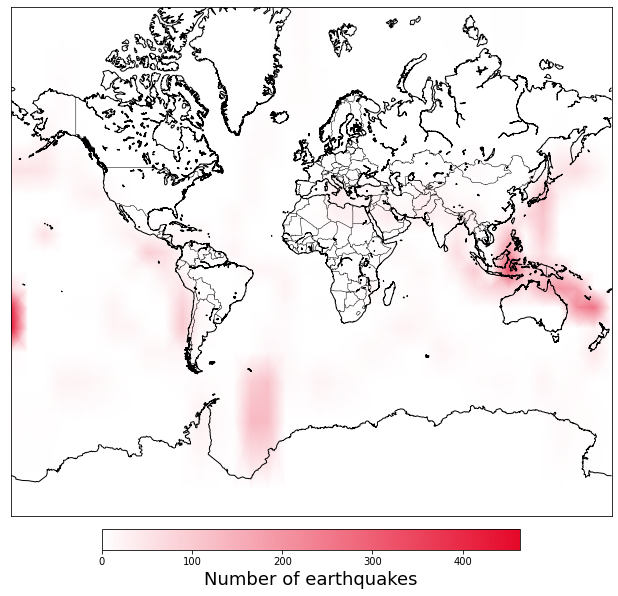

In [11]:
m = Basemap(projection='merc',llcrnrlat=-82,urcrnrlat=82,\
            llcrnrlon=-180,urcrnrlon=180, resolution = 'l')
m.drawcoastlines()
m.drawcountries()

xs, ys = m(lon_bins_2d, lat_bins_2d) # will be plotted using pcolormesh
plt.register_cmap(cmap=custom_map)
# Plot heatmap with the custom color map
plt.pcolormesh(xs, ys, density, cmap="custom_map", shading='gouraud')

# Add color bar and 
cbar = plt.colorbar(orientation='horizontal', shrink=0.625, aspect=20, fraction=0.2,pad=0.02)
cbar.set_label('Number of earthquakes',size=18)

# make image bigger:
plt.gcf().set_size_inches(12,12)
plt.show()

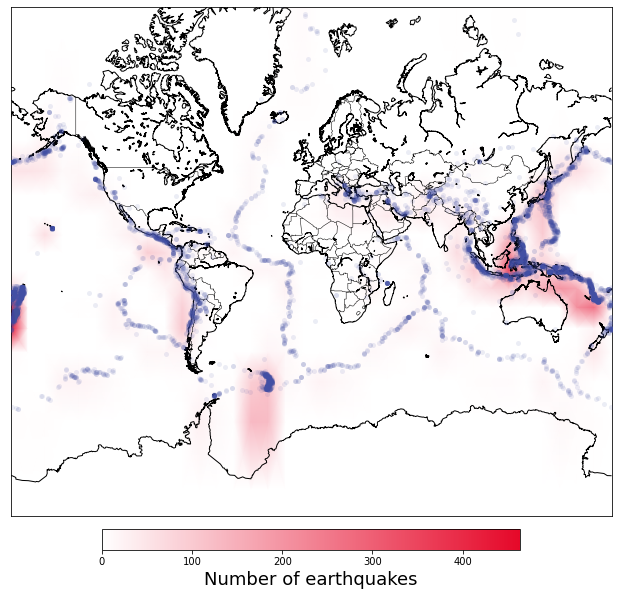

In [12]:
m = Basemap(projection='merc',llcrnrlat=-82,urcrnrlat=82,\
            llcrnrlon=-180,urcrnrlon=180, resolution = 'l')
m.drawcoastlines()
m.drawcountries()

xs, ys = m(lon_bins_2d, lat_bins_2d) # will be plotted using pcolormesh
plt.register_cmap(cmap=custom_map)
# Plot heatmap with the custom color map
plt.pcolormesh(xs, ys, density, cmap="custom_map", shading='gouraud')

# Add color bar and 
cbar = plt.colorbar(orientation='horizontal', shrink=0.625, aspect=20, fraction=0.2,pad=0.02)
cbar.set_label('Number of earthquakes',size=18)


# Plot blue scatter plot of epicenters above the heatmap:    
x,y = m(lons, lats)
m.plot(x, y, 'o', markersize=5,zorder=6, markerfacecolor='#424FA4',markeredgecolor="none", alpha=0.1)

# make image bigger:
plt.gcf().set_size_inches(12,12)
plt.show()

https://github.com/pbugnion/gmaps/blob/master/docs/source/tutorial.rst